In [1]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from sympy.parsing.sympy_parser import parse_expr

In [3]:
import numpy as np

import sympy as sym

In [4]:
from importlib.machinery import SourceFileLoader

best_response = SourceFileLoader("best_response", "src/best_response.py").load_module()

In [6]:
epsilon, c = sym.symbols("epsilon, c")

In [13]:
cvals, evals = (np.linspace(0 + 10 ** (- 3), 1  - 10 ** (- 3), 10).round(3),
                np.linspace(0 + 10 ** (- 3), 1  - 10 ** (- 3), 10).round(3))

In [343]:
with open("ALLD_payoffs.txt") as f:
    file = f.readlines()

In [344]:
labels = [f.split("\t")[0] for f in file]

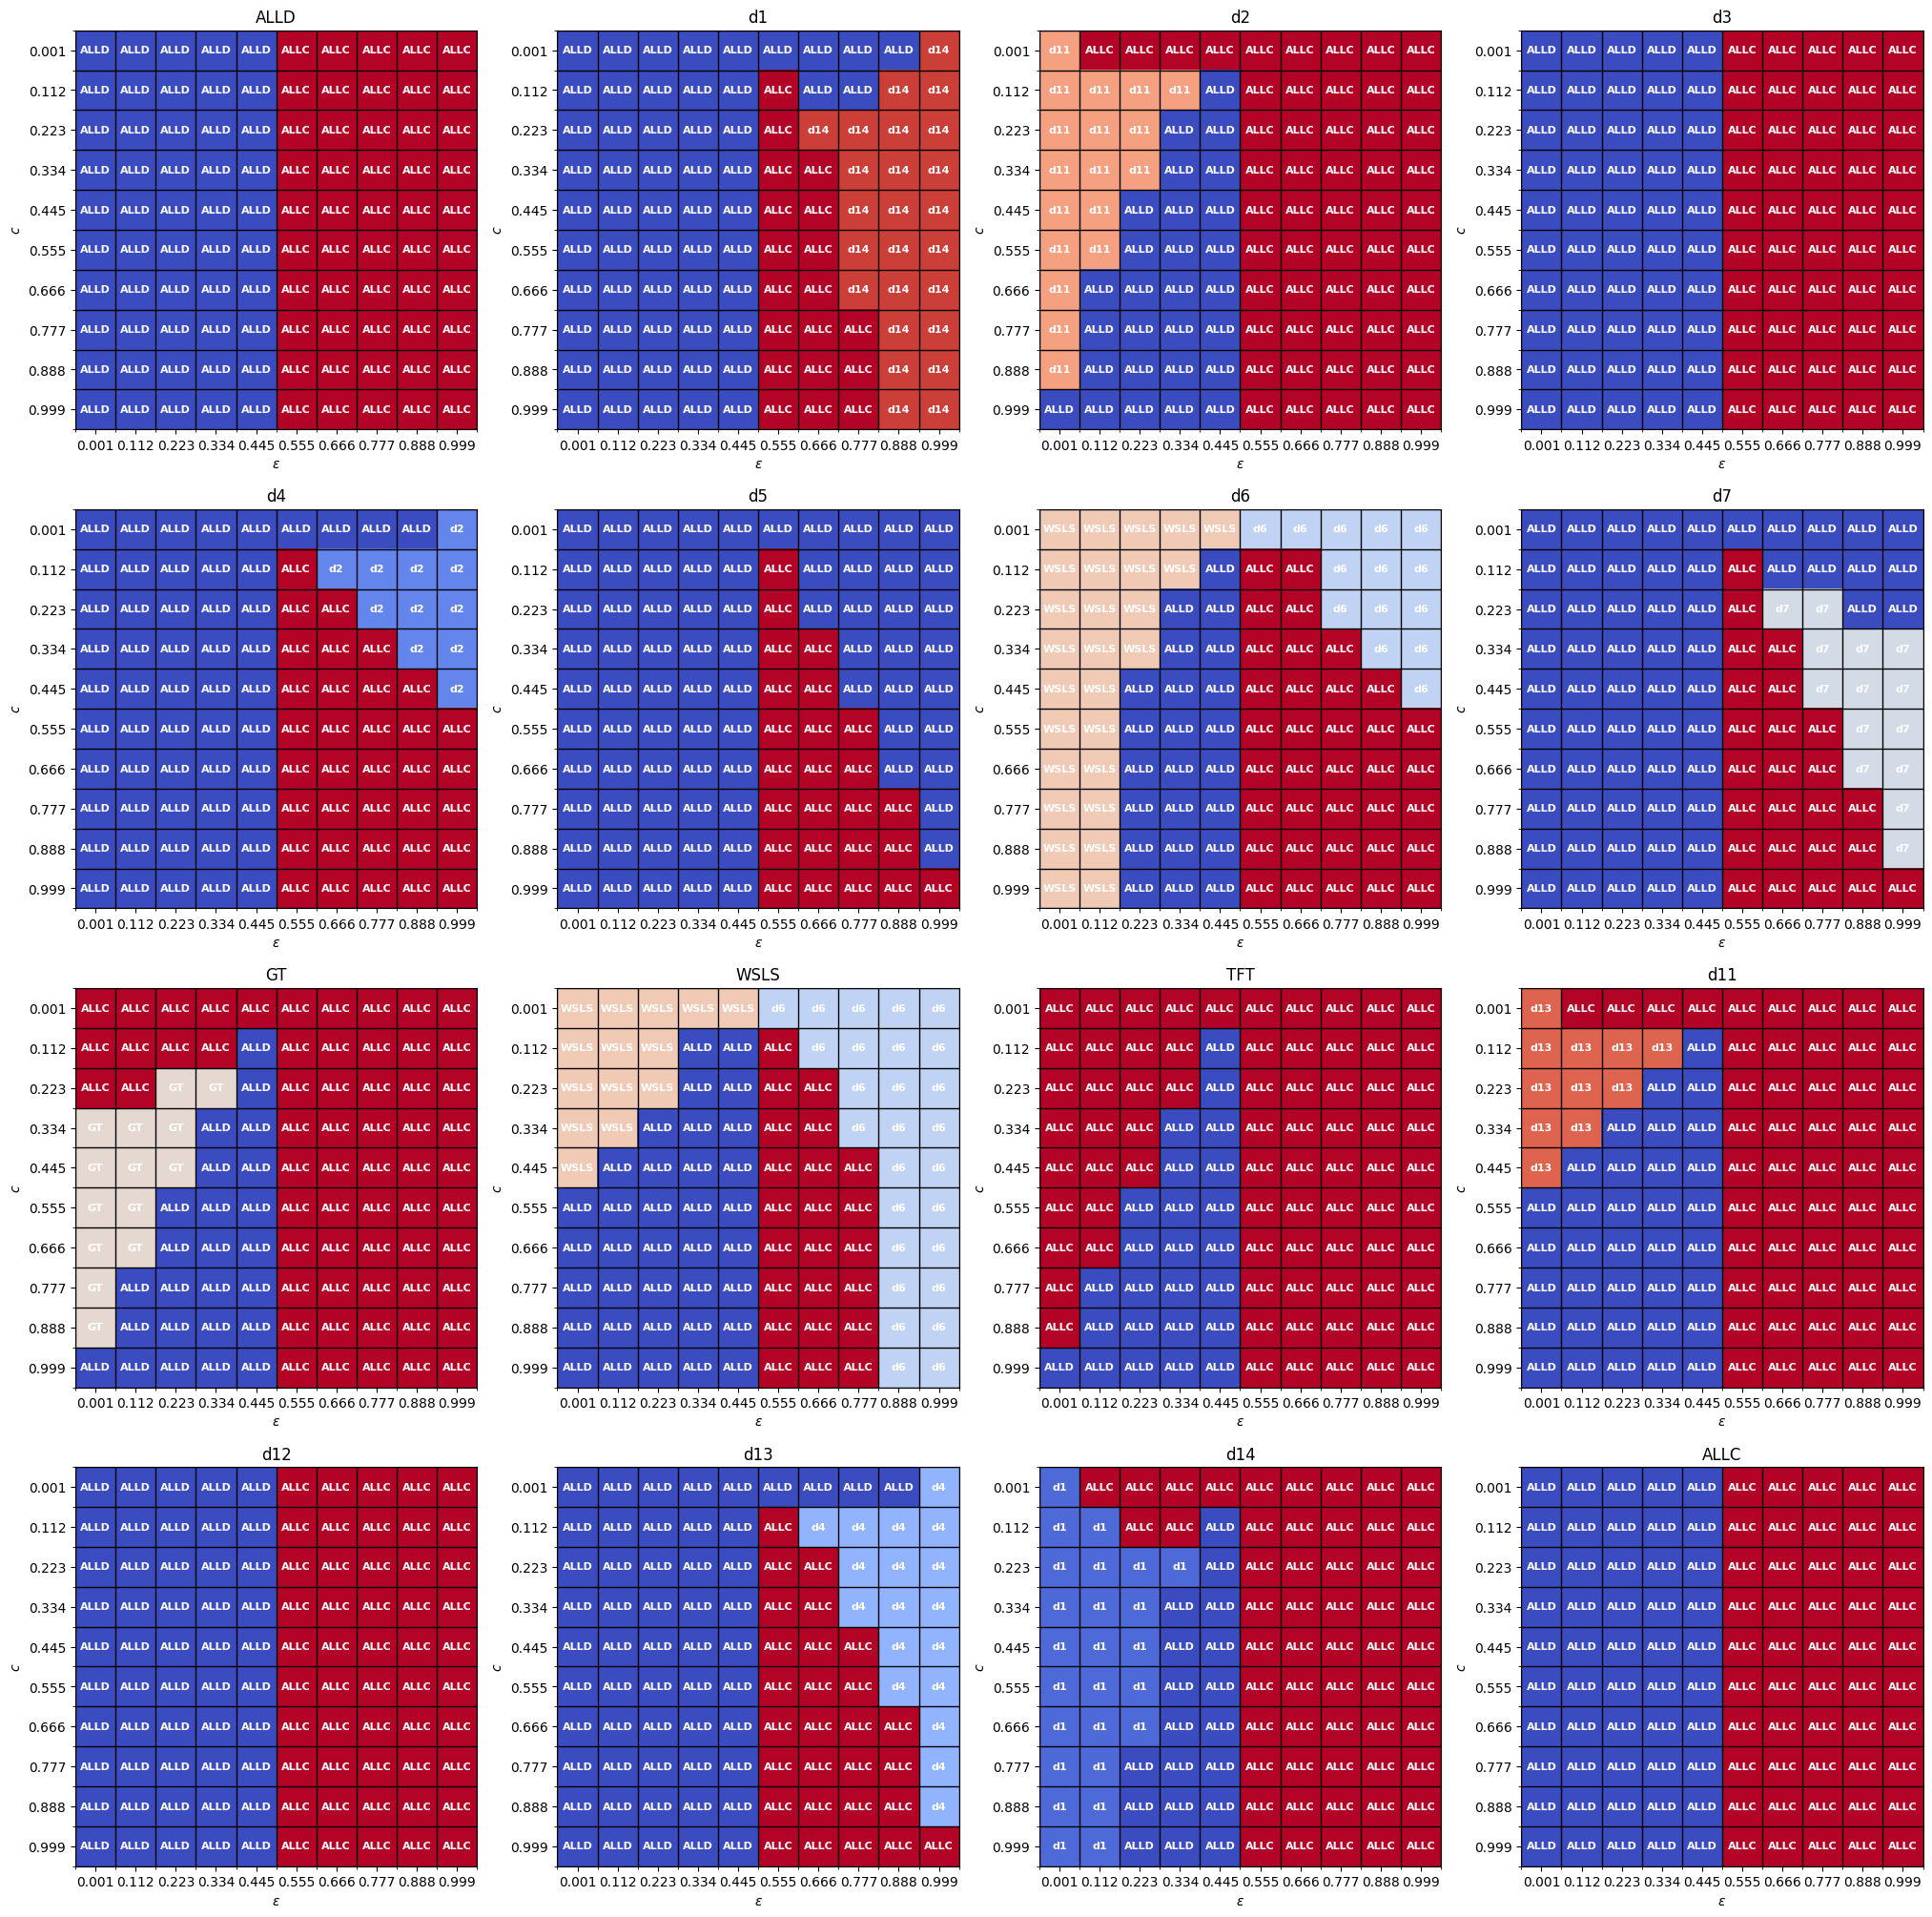

In [126]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))

for l, label in enumerate(labels):

    # Read in file
    with open(f"{label}_payoffs.txt") as f:
        file = f.readlines()
    
    # payoffs expressions
    
    payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")) for f in file]
    
    # data
    
    data = np.zeros((10, 10))

    for i, c_val in enumerate(cvals):
        for j, e_val in enumerate(evals):
            data[i, j] = np.argmax([p.subs({epsilon: e_val, c: c_val}) for p in payoffs])
        
        
    index = (int(l / 4), l % 4)
            
    im = ax[index].imshow(data, origin="upper", aspect="auto", cmap='coolwarm')

    # Major ticks
    ax[index].set_xticks(np.arange(0, 10, 1))
    ax[index].set_yticks(np.arange(0, 10, 1))

    # Labels for major ticks
    ax[index].set_xticklabels(evals)
    ax[index].set_yticklabels(cvals)
    ax[index].set_ylabel("$c$")
    ax[index].set_xlabel("$\epsilon$")

    # Minor ticks
    ax[index].set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, 10, 1), minor=True)

    ax[index].grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    ax[index].set_title(label)

    for (i, j), val in np.ndenumerate(data):
        ax[index].text(j, i, labels[int(val)], ha='center',
                       va='center',
                       color="w", 
                       weight='bold',
                       fontsize=8)

**Given that $\epsilon^2 \rightarrow 0$ & $\epsilon^3 \rightarrow 0$**

In [251]:
cvals, evals = (np.linspace(0 + 10 ** (- 3), 1  - 10 ** (- 3), 10).round(3),
                np.linspace(0 + 10 ** (- 3), .1, 10).round(3))

In [252]:
x = sym.symbols("x")

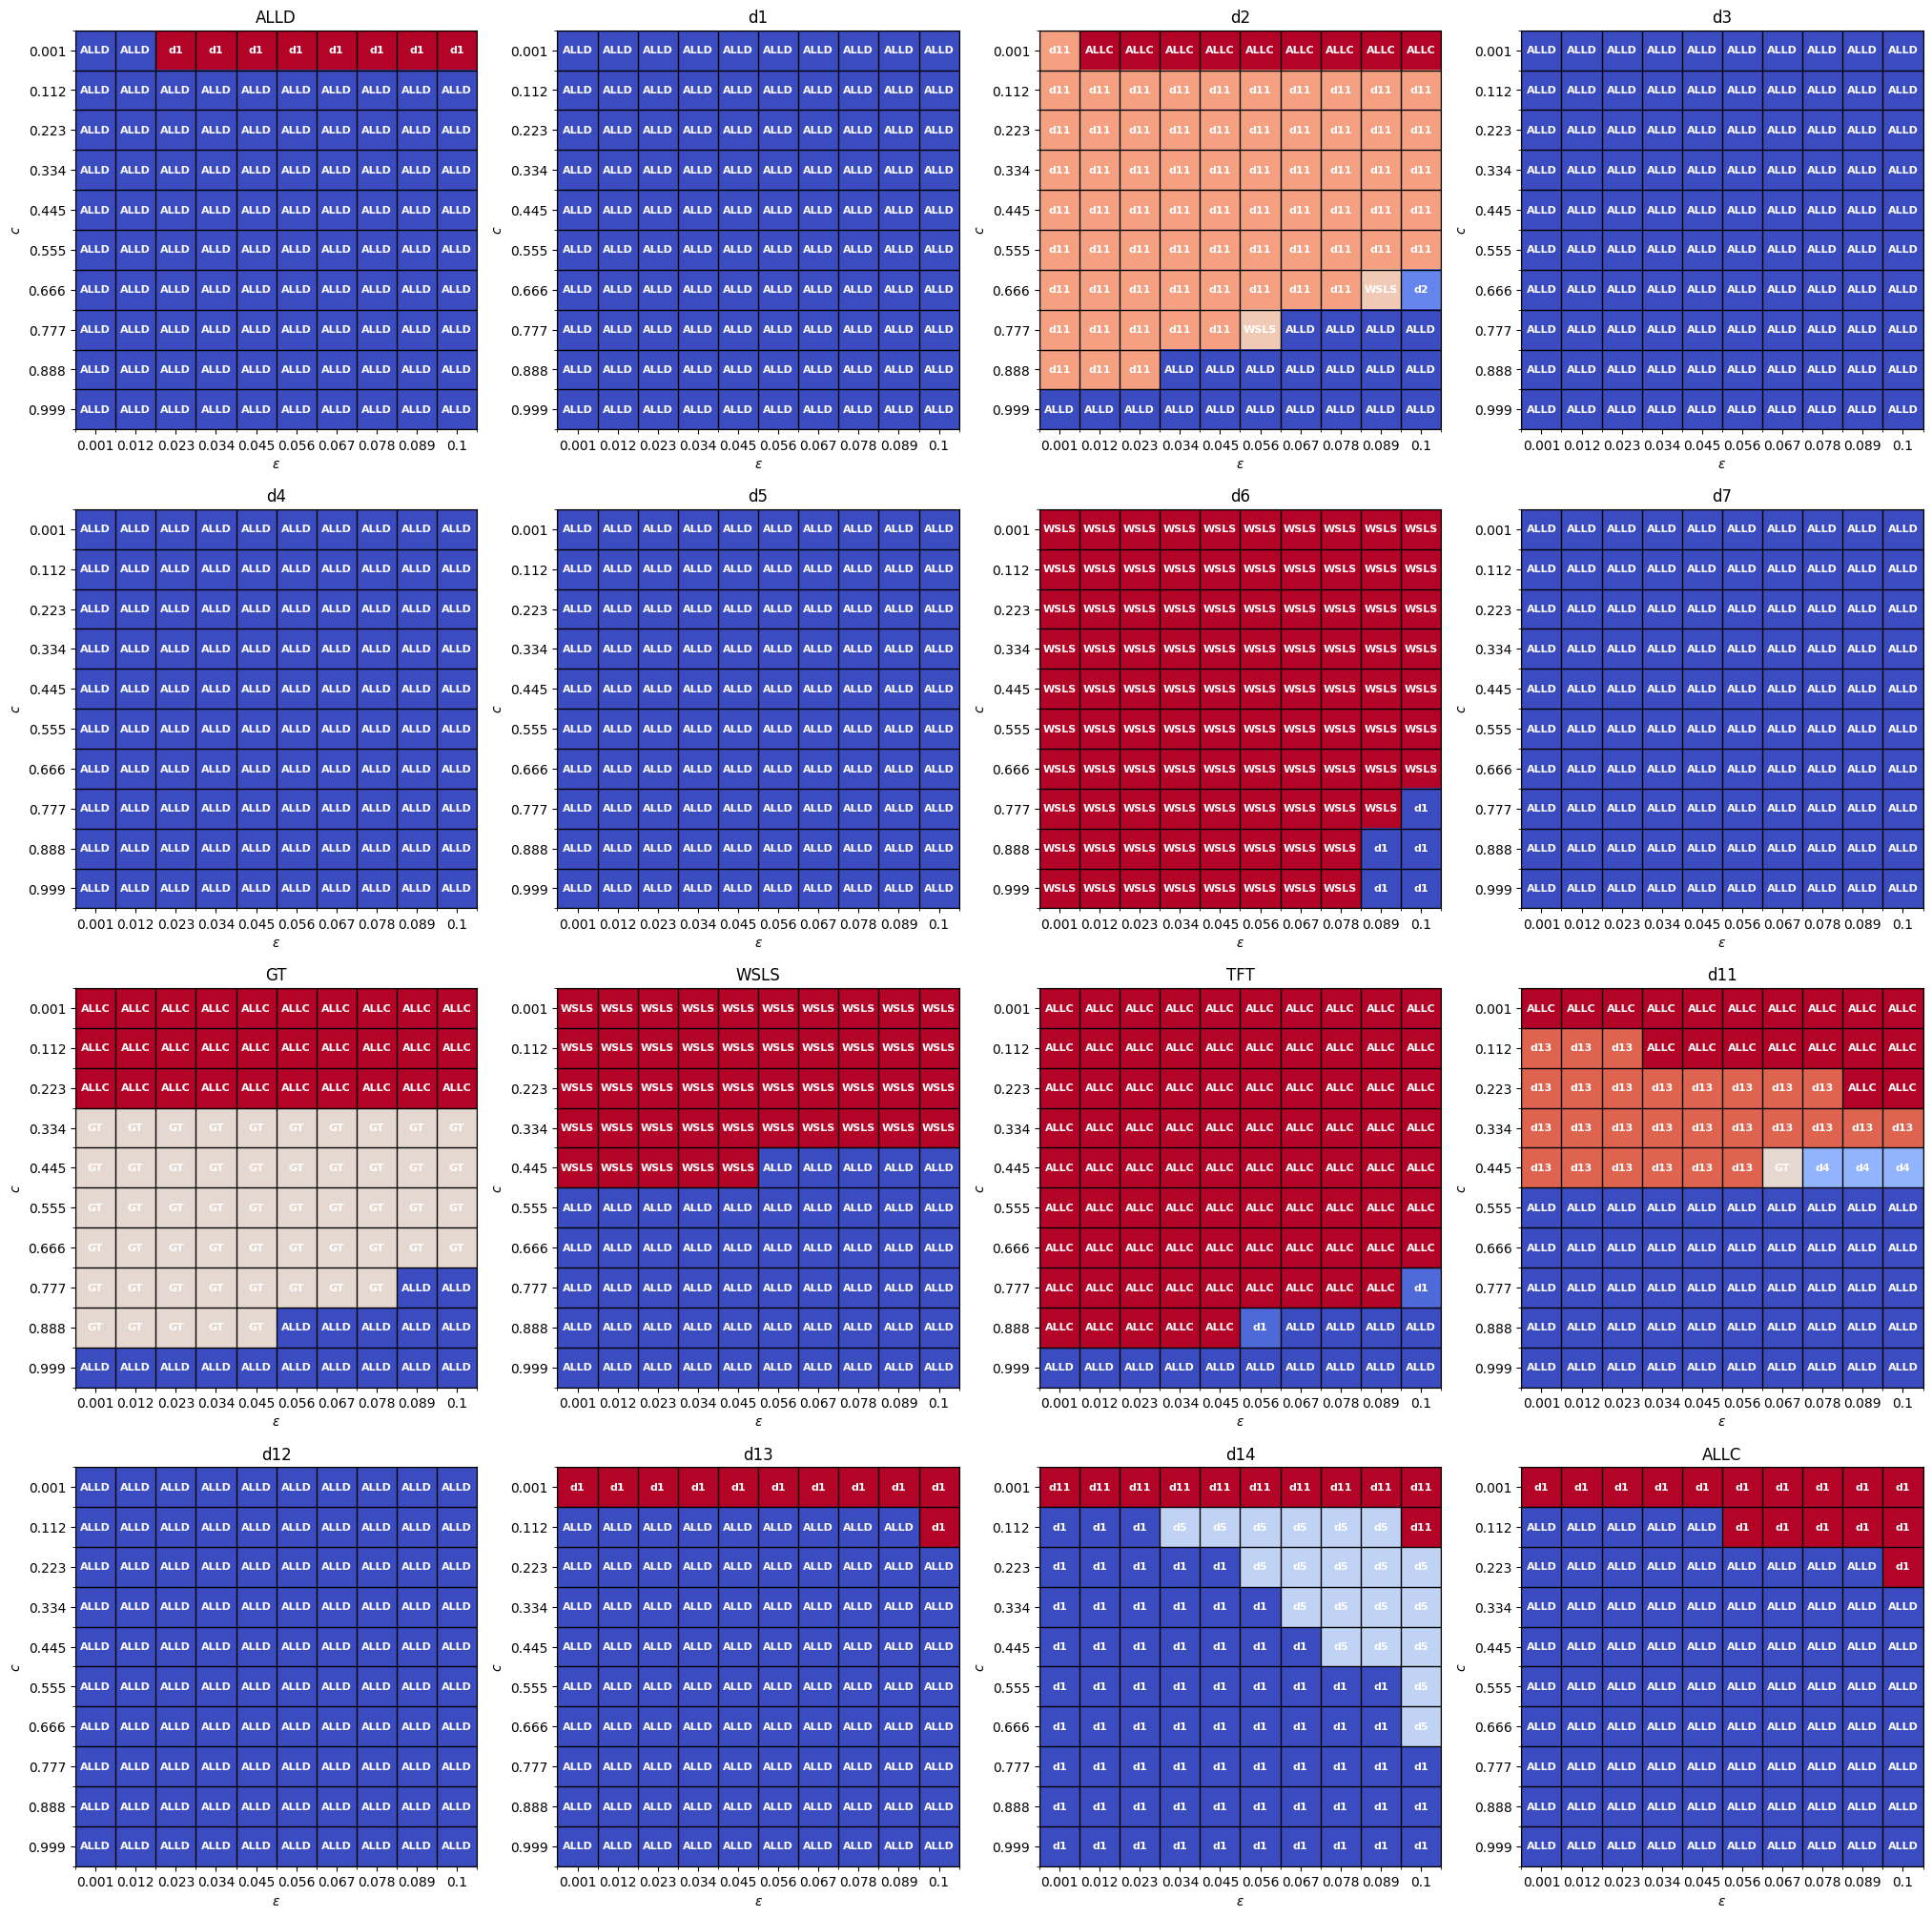

In [224]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))

for l, label in enumerate(labels):

    # Read in file
    with open(f"{label}_payoffs.txt") as f:
        file = f.readlines()
    
    # payoffs expressions
    
    payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")).collect(epsilon ** 2).subs({epsilon ** 2: x,
                                                                                     epsilon ** 3: x}) for f in file]
    
    lim_payoffs = [sym.limit(p, x, 0) for p in payoffs]
    
    # data
    
    data = np.zeros((10, 10))

    for i, c_val in enumerate(cvals):
        for j, e_val in enumerate(evals):
            data[i, j] = np.argmax([p.subs({epsilon: e_val, c: c_val}) for p in lim_payoffs])
        
        
    index = (int(l / 4), l % 4)
            
    im = ax[index].imshow(data, origin="upper", aspect="auto", cmap='coolwarm')

    # Major ticks
    ax[index].set_xticks(np.arange(0, 10, 1))
    ax[index].set_yticks(np.arange(0, 10, 1))

    # Labels for major ticks
    ax[index].set_xticklabels(evals)
    ax[index].set_yticklabels(cvals)
    ax[index].set_ylabel("$c$")
    ax[index].set_xlabel("$\epsilon$")

    # Minor ticks
    ax[index].set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, 10, 1), minor=True)

    ax[index].grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    ax[index].set_title(label)

    for (i, j), val in np.ndenumerate(data):
        ax[index].text(j, i, labels[int(val)], ha='center',
                       va='center',
                       color="w", 
                       weight='bold',

                       fontsize=8)

In [345]:
best_responses = []


for label in labels:
    
    with open(f"{label}_payoffs.txt") as f:
    
        file = f.readlines()
        
    payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")) for f in file]

    lim_payoffs = [sym.limit(p, epsilon, 0).simplify() for p in payoffs]

    mins = np.array([l.subs({c:0}) for l in lim_payoffs])

    maxs = np.array([l.subs({c:1}) for l in lim_payoffs])
    
    best_responses.append(set(np.where(mins == max(mins))[0]).intersection(set(np.where(maxs == max(maxs))[0])))

In [346]:
best_responses

[{0, 2, 8, 10},
 {0, 8},
 {3, 11},
 {0, 4, 8},
 {0, 8},
 {0, 4, 8},
 {1, 9},
 {0, 4, 8, 9},
 set(),
 set(),
 {13, 14, 15},
 set(),
 {0},
 {0, 1, 4, 5},
 {1, 5},
 {0, 1, 4, 5}]

In [349]:
data = np.zeros((10, 10))

payoffs[0].subs()

-c*epsilon - epsilon + 1

In [353]:
sym.limit(payoffs[1].subs({epsilon ** 2: x}), x, 0).factor()

-(2*c*epsilon - epsilon - 1)/(2*epsilon + 1)

In [358]:
sym.limit(payoffs[4].subs({epsilon ** 3: x, epsilon ** 2: x}), x, 0).factor()

(c*epsilon + 2*epsilon - 1)/(epsilon - 1)

In [341]:
set(np.where(mins == max(mins))[0]).intersection(set(np.where(maxs == max(maxs))[0]))

{3, 11}

In [336]:
set(np.where(mins == max(mins))[0]).union(set(np.where(maxs == max(maxs)))[0])

TypeError: unhashable type: 'numpy.ndarray'

In [245]:
paper = (1 - c)/2 - (1 + c) * epsilon / 2

paper

-c/2 - epsilon*(c + 1)/2 + 1/2

In [225]:
with open(f"d2_payoffs.txt") as f:
    
    file = f.readlines()

In [288]:

payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")).collect(epsilon ** 2).subs({epsilon ** 2: x,
                                                                                 epsilon ** 3: x}) for f in file]


In [290]:
payoffs[3]

(-2*c*epsilon - c + 4*x + 1)/(4*epsilon + 2)

In [300]:
lim_payoffs = [sym.limit(p, x, 0).simplify() for p in payoffs]

In [302]:
sym.Matrix(lim_payoffs)

Matrix([
[             epsilon*(-2*c*epsilon - c + 2)/(2*epsilon + 1)],
[                          (c + epsilon - 1)/(4*epsilon - 3)],
[                             -c/4 - epsilon*(c - 1)/2 + 1/4],
[                 (-2*c*epsilon - c + 1)/(2*(2*epsilon + 1))],
[                epsilon*(3*c*epsilon - 2*c - 3*epsilon + 2)],
[                   (-3*c*epsilon + 2*c - 1)/(2*epsilon - 3)],
[epsilon*(6*c*epsilon - 4*c - 4*epsilon + 3)/(2*epsilon + 1)],
[                   (-3*c*epsilon + 2*c - 1)/(4*epsilon - 3)],
[                 epsilon*(-2*c*epsilon - c - 2*epsilon + 2)],
[                      (c + epsilon - 1)/(3*(2*epsilon - 1))],
[                        (c*epsilon + c - 1)/(2*epsilon - 3)],
[                       -c*epsilon/2 - c/2 - epsilon/2 + 1/2],
[     (-3*c*epsilon + 2*c - epsilon - 1)/(2*(3*epsilon - 2))],
[                        3*c*epsilon/2 - c - epsilon/2 + 1/2],
[      (-10*c*epsilon + 4*c + 3*epsilon - 2)/(8*epsilon - 5)],
[       (-5*c*epsilon + 2*c + 2*epsilon - 1)/(

In [361]:
pure_strategies = list(itertools.product([0, 1], repeat=5))

labels = [f"d{i}" for i, _ in enumerate(pure_strategies)]

In [362]:
labels[0] = "ALLD (D)"
labels[16] = "ALLD (D)"

labels[15] = "ALLC (D)"
labels[31] = "ALLC (C)"

labels[8] = "GT (D)"
labels[24] = "GT (C)"

labels[9] = "WSLS (D)"
labels[25] = "WSLS (C)"

labels[10] = 'TFT (D)'
labels[26] = 'TFT (C)'

In [367]:
for i, p in enumerate(pure_strategies):
    print(f"|{labels[i]}|       {p}|")

|ALLD (D)|       (0, 0, 0, 0, 0)|
|d1|       (0, 0, 0, 0, 1)|
|d2|       (0, 0, 0, 1, 0)|
|d3|       (0, 0, 0, 1, 1)|
|d4|       (0, 0, 1, 0, 0)|
|d5|       (0, 0, 1, 0, 1)|
|d6|       (0, 0, 1, 1, 0)|
|d7|       (0, 0, 1, 1, 1)|
|GT (D)|       (0, 1, 0, 0, 0)|
|WSLS (D)|       (0, 1, 0, 0, 1)|
|TFT (D)|       (0, 1, 0, 1, 0)|
|d11|       (0, 1, 0, 1, 1)|
|d12|       (0, 1, 1, 0, 0)|
|d13|       (0, 1, 1, 0, 1)|
|d14|       (0, 1, 1, 1, 0)|
|ALLC (D)|       (0, 1, 1, 1, 1)|
|ALLD (D)|       (1, 0, 0, 0, 0)|
|d17|       (1, 0, 0, 0, 1)|
|d18|       (1, 0, 0, 1, 0)|
|d19|       (1, 0, 0, 1, 1)|
|d20|       (1, 0, 1, 0, 0)|
|d21|       (1, 0, 1, 0, 1)|
|d22|       (1, 0, 1, 1, 0)|
|d23|       (1, 0, 1, 1, 1)|
|GT (C)|       (1, 1, 0, 0, 0)|
|WSLS (C)|       (1, 1, 0, 0, 1)|
|TFT (C)|       (1, 1, 0, 1, 0)|
|d27|       (1, 1, 0, 1, 1)|
|d28|       (1, 1, 1, 0, 0)|
|d29|       (1, 1, 1, 0, 1)|
|d30|       (1, 1, 1, 1, 0)|
|ALLC (C)|       (1, 1, 1, 1, 1)|
